# Fundamentals of Quantum Computing Using Qiskit v2.X Developer

https://www.ibm.com/training/certification/ibm-certified-quantum-computation-using-qiskit-v2x-developer-associate-C9008400

In [17]:
import qiskit
print(qiskit.__version__)

2.2.3


## Section 1: Perform quantum operations

This section accounts for approximately 16% of the exam.

### Task 1.1: Define Pauli Operators

**References**

https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.quantum_info.Pauli

https://www.youtube.com/watch?v=XvY8i3-x-Jg

In [16]:
from qiskit.quantum_info import Pauli

From string:

An n-qubit Pauli may be represented by a string consisting of n characters from `['I', 'X', 'Y', 'Z']`, and optionally phase coefficient in `['', '-i', '-', 'i']`. For example: `'XYZ'` or `'-iZIZ'`.

Here qubit 0 corresponds to the rightmost character

In [9]:
# Can initialize from string
p = Pauli('IXYZ')
# use p.to_label() to convert back to string

In [ ]:
p.phase

0


### Task 1.2: Apply quantum operations

**References**

https://quantum.cloud.ibm.com/docs/en/api/qiskit/circuit_library

https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.circuit.QuantumCircuit

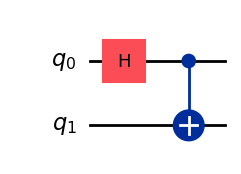

In [1]:
from qiskit import QuantumCircuit
 
# Create a new circuit with two qubits
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
 
# Return a text drawing of the circuit.
qc.draw(output ='mpl')

In [2]:
qc = QuantumCircuit(2, 2, metadata={'experiment_type': 'Bell state experiment'}, name='bell_state')

In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
 
qr1 = QuantumRegister(2)
qr2 = QuantumRegister(1)
cr1 = ClassicalRegister(2)
cr2 = ClassicalRegister(1)
qc = QuantumCircuit(qr1, qr2, cr1, cr2)
 
print("List the qubits in this circuit:", qc.qubits)
print("List the classical bits in this circuit:", qc.clbits)

List the qubits in this circuit: [<Qubit register=(2, "q0"), index=0>, <Qubit register=(2, "q0"), index=1>, <Qubit register=(1, "q1"), index=0>]
List the classical bits in this circuit: [<Clbit register=(2, "c0"), index=0>, <Clbit register=(2, "c0"), index=1>, <Clbit register=(1, "c1"), index=0>]


Parameters

- Parameter objects sorted alphabetically
- Parameter vector objects still sorted numerically

In [8]:
from qiskit.circuit import QuantumCircuit, Parameter
a, b, elephant = Parameter("a"), Parameter("b"), Parameter("elephant")
circuit = QuantumCircuit(1)
circuit.rx(b, 0)
circuit.rz(elephant, 0)
circuit.ry(a, 0)
circuit.parameters

ParameterView([Parameter(a), Parameter(b), Parameter(elephant)])

In [10]:
from qiskit.circuit import QuantumCircuit, ParameterVector
x = ParameterVector("x", 12)
circuit = QuantumCircuit(1)
for x_i in x:
     circuit.rx(x_i, 0)

circuit.parameters

ParameterView([ParameterVectorElement(x[0]), ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3]), ParameterVectorElement(x[4]), ParameterVectorElement(x[5]), ParameterVectorElement(x[6]), ParameterVectorElement(x[7]), ParameterVectorElement(x[8]), ParameterVectorElement(x[9]), ParameterVectorElement(x[10]), ParameterVectorElement(x[11])])

Operation:
- e.g. Gate, Reset, Barrier, Measure, and operators such as Clifford

Instruction:
- can convert simple circuits acting only on **qubits** and **clbits** into a Instruction with `to_instruction()`

Gate:
- can convert simple circuits that act only on **qubits** with **unitary operations** into a Gate using `to_gate()`

Adding general operations

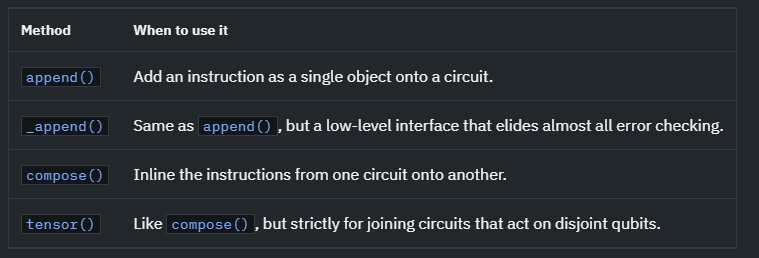

Adding standard circuit instructions:

https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.circuit.QuantumCircuit#methods-to-add-standard-instructions

Adding control flow:

https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.circuit.QuantumCircuit#adding-control-flow-to-circuits

https://quantum.cloud.ibm.com/docs/en/api/qiskit/circuit#circuit-control-flow-repr

## Section 2: Visualize quantum circuits, measurements, and states 

This section accounts for approximately 11% of the exam. 

### Task 2.1: Visualize quantum circuits

References:

https://quantum.cloud.ibm.com/docs/en/guides/visualize-circuits

In [1]:
from qiskit import QuantumCircuit
# Build a quantum circuit
circuit = QuantumCircuit(3, 3)
circuit.x(1)
circuit.h(range(3))
circuit.cx(0, 1)
circuit.measure(range(3), range(3))

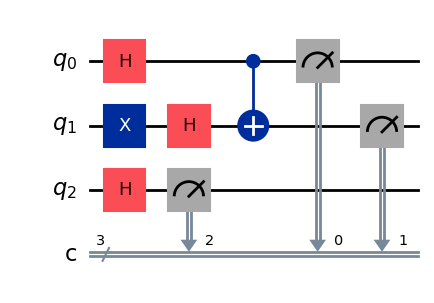

In [2]:
# Matplotlib drawing
circuit.draw(output="mpl")

In [ ]:
# Latex drawing
# Requires having LaTeX installed
circuit.draw(output="latex")

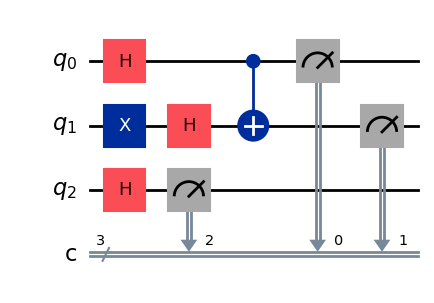

In [ ]:
# Save as an image using the Matplotlib drawer
circuit.draw(output="mpl", filename="circuit-mpl.jpeg")

# Or save a LaTeX rendering
#circuit.draw(output="latex", filename="circuit-latex.pdf")

Customising the output

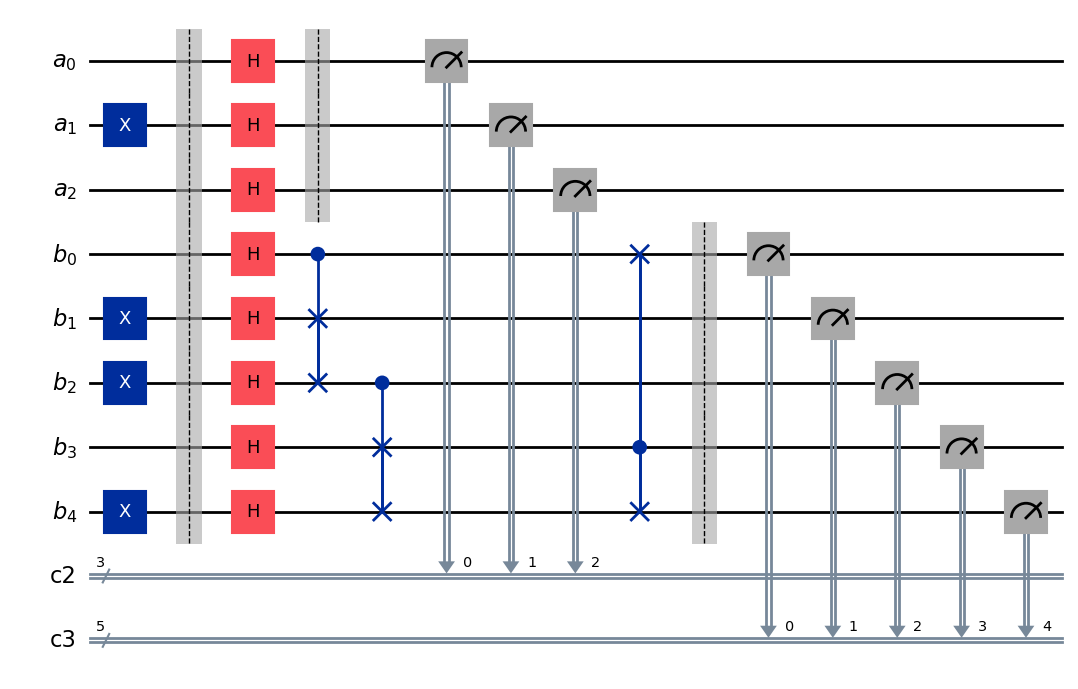

In [8]:
from qiskit import QuantumRegister, ClassicalRegister
 
# Draw a new circuit with barriers and more registers
q_a = QuantumRegister(3, name="a")
q_b = QuantumRegister(5, name="b")
c_a = ClassicalRegister(3)
c_b = ClassicalRegister(5)
 
circuit = QuantumCircuit(q_a, q_b, c_a, c_b)
circuit.x(q_a[1])
circuit.x(q_b[1])
circuit.x(q_b[2])
circuit.x(q_b[4])
circuit.barrier()
circuit.h(q_a)
circuit.barrier(q_a)
circuit.h(q_b)
circuit.cswap(q_b[0], q_b[1], q_b[2])
circuit.cswap(q_b[2], q_b[3], q_b[4])
circuit.cswap(q_b[3], q_b[4], q_b[0])
circuit.barrier(q_b)
circuit.measure(q_a, c_a)
circuit.measure(q_b, c_b)

# Draw the circuit
circuit.draw(output="mpl")

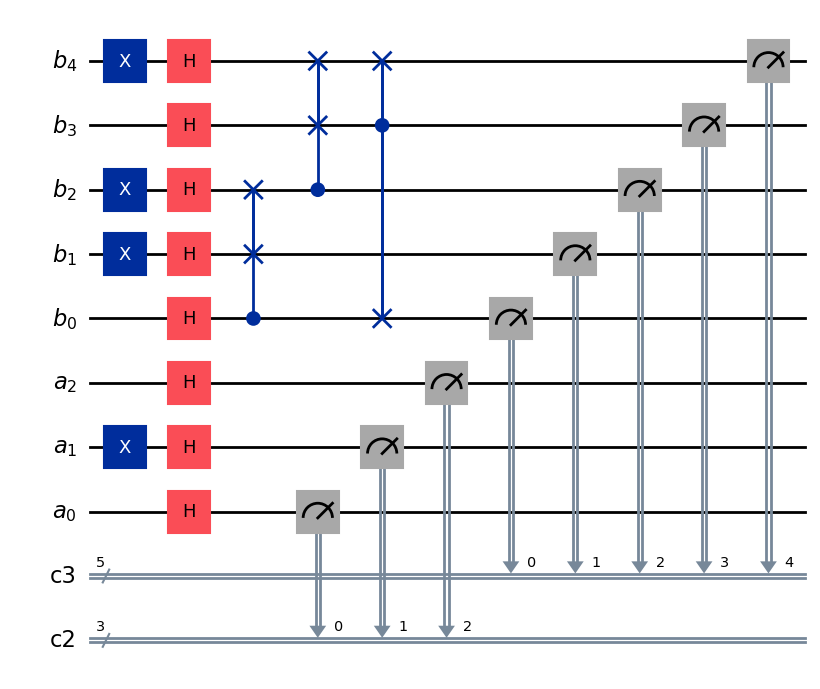

In [10]:
# Draw the circuit with reversed bit order or without barriers
circuit.draw(output="mpl", reverse_bits=True, plot_barriers=False)

Folding:
- Text: limits line length
- MPL: number of visual layers before folding to the next line

In [ ]:
circuit = QuantumCircuit(1)
for _ in range(10):
    circuit.h(0)
# limit line length to 40 characters
circuit.draw(output="text", fold=40)

┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐»
q: ┤ H ├┤ H ├┤ H ├┤ H ├┤ H ├┤ H ├┤ H ├»
   └───┘└───┘└───┘└───┘└───┘└───┘└───┘»
«   ┌───┐┌───┐┌───┐
«q: ┤ H ├┤ H ├┤ H ├
«   └───┘└───┘└───┘

Style

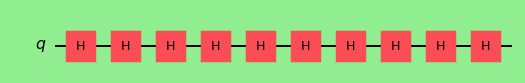

In [13]:
# Change the background color in mpl
 
style = {"backgroundcolor": "lightgreen"}
circuit.draw(output="mpl", style=style, scale=0.7)

### Task 2.2: Visualize quantum measurements

References:

https://quantum.cloud.ibm.com/docs/en/guides/classical-feedforward-and-control-flow

https://quantum.cloud.ibm.com/docs/en/api/qiskit/visualization

https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.visualization.plot_gate_map

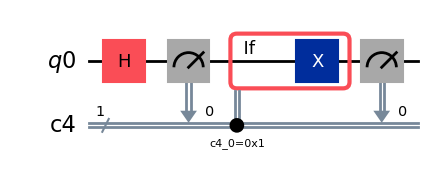

In [14]:
# if statement
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
 
qubits = QuantumRegister(1)
clbits = ClassicalRegister(1)
circuit = QuantumCircuit(qubits, clbits)
(q0,) = qubits
(c0,) = clbits
 
circuit.h(q0)
# Use MidCircuitMeasure() if it's supported by the backend.
# circuit.append(MidCircuitMeasure(), [q0], [c0])
circuit.measure(q0, c0)
with circuit.if_test((c0, 1)):
    circuit.x(q0)
circuit.measure(q0, c0)
circuit.draw("mpl")
 
# example output counts: {'0': 1024}

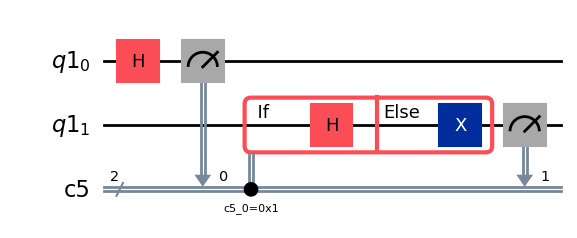

In [15]:
qubits = QuantumRegister(2)
clbits = ClassicalRegister(2)
circuit = QuantumCircuit(qubits, clbits)
(q0, q1) = qubits
(c0, c1) = clbits
 
circuit.h(q0)
circuit.measure(q0, c0)
with circuit.if_test((c0, 1)) as else_:
    circuit.h(q1)
with else_:
    circuit.x(q1)
circuit.measure(q1, c1)
 
circuit.draw("mpl")
 
# example output counts: {'01': 260, '11': 272, '10': 492}

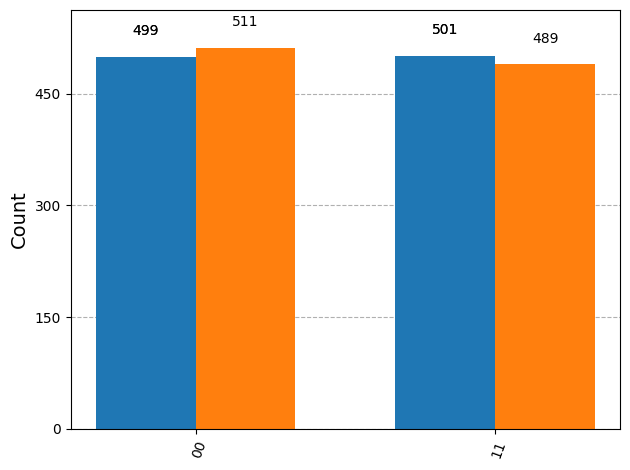

In [16]:
from qiskit.visualization import plot_histogram
 
counts1 = {'00': 499, '11': 501}
counts2 = {'00': 511, '11': 489}
 
data = [counts1, counts2]
plot_histogram(data)

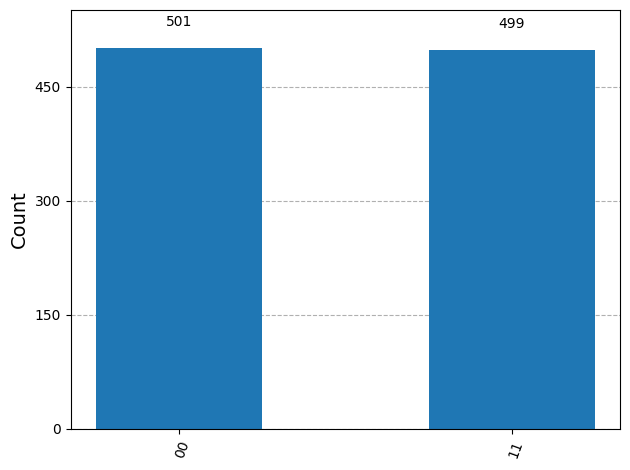

In [17]:
from qiskit.visualization import plot_histogram
 
counts = {"00": 501, "11": 499}
plot_histogram(counts)

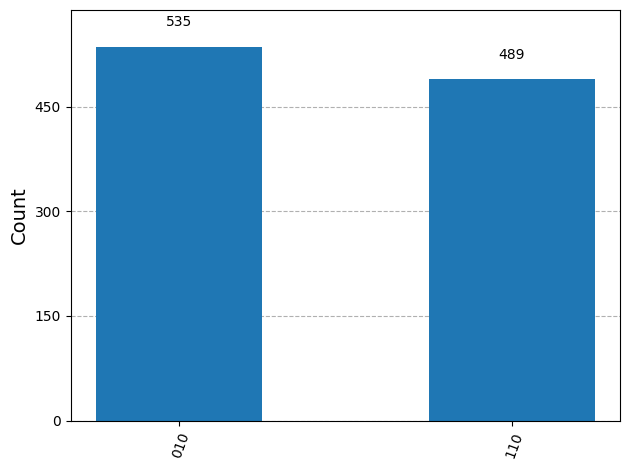

In [37]:
from qiskit.quantum_info import Statevector 
from qiskit.visualization import plot_histogram 

state = Statevector([0.+0.j, 0.+0.j, 0.70710678+0.j, 0.+0.j, 
0.+0.j, 0.+0.j, -0.70710678+0.j, 0.+0.j]) 
counts = state.sample_counts(shots=1024) 
plot_histogram(counts)

In [35]:
state

Statevector([ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
              0.        +0.j,  0.        +0.j, -0.70710678+0.j,
              0.        +0.j,  0.        +0.j],
            dims=(2, 2, 2))


Distribution visualizations

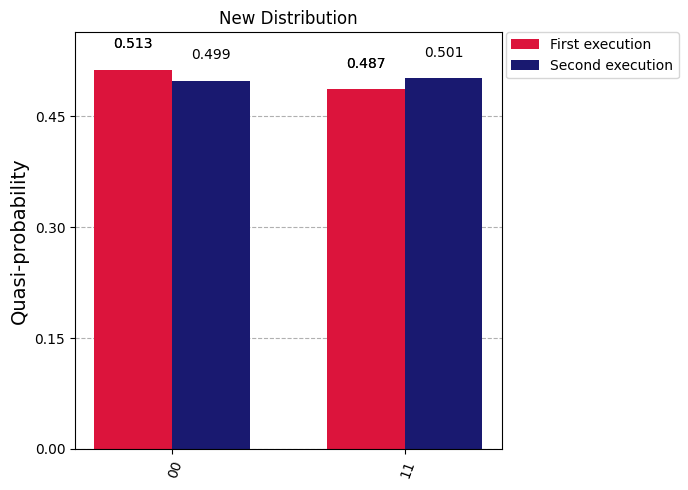

In [19]:
# Plot two counts in the same figure with legends and colors specified.
 
from qiskit.visualization import plot_distribution
 
counts1 = {'00': 525, '11': 499}
counts2 = {'00': 511, '11': 514}
 
legend = ['First execution', 'Second execution']
 
plot_distribution([counts1, counts2], legend=legend, color=['crimson','midnightblue'],
                title="New Distribution")

In [20]:
# You can sort the bitstrings using different methods.
 
counts = {'001': 596, '011': 211, '010': 50, '000': 117, '101': 33, '111': 8,
        '100': 6, '110': 3}
 
# Sort by the counts in descending order
dist1 = plot_distribution(counts, sort='value_desc')
 
# Sort by the hamming distance (the number of bit flips to change from
# one bitstring to the other) from a target string.
dist2 = plot_distribution(counts, sort='hamming', target_string='001')

State visualizations
<table class="inline-block mx-auto md:mx-0 max-w-full border border-border-subtle-00 border-spacing-0 whitespace-nowrap md:whitespace-normal overflow-x-auto md:tabular-nums text-text-primary"><thead><tr class="border-layer-02 border-b"><th class="text-heading-compact-01 border-layer-02 border-t p-12 m-0 text-left empty:hidden"></th><th class="text-heading-compact-01 border-layer-02 border-t p-12 m-0 text-left empty:hidden"></th></tr></thead><tbody><tr class="border-layer-02 border-b"><td class="p-12 m-0 align-top [&amp;_ul]:!my-0 [&amp;_ul]:list-disc [&amp;_ul]:list-inside [&amp;_ol]:!my-0 [&amp;_ol]:list-decimal [&amp;_ol]:list-inside"><a title="qiskit.visualization.plot_bloch_vector" class="text-link-primary no-underline hover:underline inline" href="/docs/api/qiskit/qiskit.visualization.plot_bloch_vector"><code class="text-code-02 inline px-4 bg-background border border-transparent dark:border-border-subtle-00 [overflow-wrap:anywhere] group-[.pre-el]:text-code-02 group-[.pre-el]:inline-block group-[.pre-el]:whitespace-pre group-[.pre-el]:p-12 group-[.pre-el]:pr-[50px] group-[.pre-el]:bg-inherit dark:group-[.pre-el]:border-transparent group-[.paragraph-el]:whitespace-normal">plot_bloch_vector</code></a>(bloch[,&nbsp;title,&nbsp;ax,&nbsp;...])</td><td class="p-12 m-0 align-top [&amp;_ul]:!my-0 [&amp;_ul]:list-disc [&amp;_ul]:list-inside [&amp;_ol]:!my-0 [&amp;_ol]:list-decimal [&amp;_ol]:list-inside">Plot the Bloch sphere.</td></tr><tr class="border-layer-02 border-b"><td class="p-12 m-0 align-top [&amp;_ul]:!my-0 [&amp;_ul]:list-disc [&amp;_ul]:list-inside [&amp;_ol]:!my-0 [&amp;_ol]:list-decimal [&amp;_ol]:list-inside"><a title="qiskit.visualization.plot_bloch_multivector" class="text-link-primary no-underline hover:underline inline" href="/docs/api/qiskit/qiskit.visualization.plot_bloch_multivector"><code class="text-code-02 inline px-4 bg-background border border-transparent dark:border-border-subtle-00 [overflow-wrap:anywhere] group-[.pre-el]:text-code-02 group-[.pre-el]:inline-block group-[.pre-el]:whitespace-pre group-[.pre-el]:p-12 group-[.pre-el]:pr-[50px] group-[.pre-el]:bg-inherit dark:group-[.pre-el]:border-transparent group-[.paragraph-el]:whitespace-normal">plot_bloch_multivector</code></a>(state[,&nbsp;title,&nbsp;...])</td><td class="p-12 m-0 align-top [&amp;_ul]:!my-0 [&amp;_ul]:list-disc [&amp;_ul]:list-inside [&amp;_ol]:!my-0 [&amp;_ol]:list-decimal [&amp;_ol]:list-inside">Plot a Bloch sphere for each qubit.</td></tr><tr class="border-layer-02 border-b"><td class="p-12 m-0 align-top [&amp;_ul]:!my-0 [&amp;_ul]:list-disc [&amp;_ul]:list-inside [&amp;_ol]:!my-0 [&amp;_ol]:list-decimal [&amp;_ol]:list-inside"><a title="qiskit.visualization.plot_state_city" class="text-link-primary no-underline hover:underline inline" href="/docs/api/qiskit/qiskit.visualization.plot_state_city"><code class="text-code-02 inline px-4 bg-background border border-transparent dark:border-border-subtle-00 [overflow-wrap:anywhere] group-[.pre-el]:text-code-02 group-[.pre-el]:inline-block group-[.pre-el]:whitespace-pre group-[.pre-el]:p-12 group-[.pre-el]:pr-[50px] group-[.pre-el]:bg-inherit dark:group-[.pre-el]:border-transparent group-[.paragraph-el]:whitespace-normal">plot_state_city</code></a>(state[,&nbsp;title,&nbsp;figsize,&nbsp;...])</td><td class="p-12 m-0 align-top [&amp;_ul]:!my-0 [&amp;_ul]:list-disc [&amp;_ul]:list-inside [&amp;_ol]:!my-0 [&amp;_ol]:list-decimal [&amp;_ol]:list-inside">Plot the cityscape of quantum state.</td></tr><tr class="border-layer-02 border-b"><td class="p-12 m-0 align-top [&amp;_ul]:!my-0 [&amp;_ul]:list-disc [&amp;_ul]:list-inside [&amp;_ol]:!my-0 [&amp;_ol]:list-decimal [&amp;_ol]:list-inside"><a title="qiskit.visualization.plot_state_hinton" class="text-link-primary no-underline hover:underline inline" href="/docs/api/qiskit/qiskit.visualization.plot_state_hinton"><code class="text-code-02 inline px-4 bg-background border border-transparent dark:border-border-subtle-00 [overflow-wrap:anywhere] group-[.pre-el]:text-code-02 group-[.pre-el]:inline-block group-[.pre-el]:whitespace-pre group-[.pre-el]:p-12 group-[.pre-el]:pr-[50px] group-[.pre-el]:bg-inherit dark:group-[.pre-el]:border-transparent group-[.paragraph-el]:whitespace-normal">plot_state_hinton</code></a>(state[,&nbsp;title,&nbsp;figsize,&nbsp;...])</td><td class="p-12 m-0 align-top [&amp;_ul]:!my-0 [&amp;_ul]:list-disc [&amp;_ul]:list-inside [&amp;_ol]:!my-0 [&amp;_ol]:list-decimal [&amp;_ol]:list-inside">Plot a hinton diagram for the density matrix of a quantum state.</td></tr><tr class="border-layer-02 border-b"><td class="p-12 m-0 align-top [&amp;_ul]:!my-0 [&amp;_ul]:list-disc [&amp;_ul]:list-inside [&amp;_ol]:!my-0 [&amp;_ol]:list-decimal [&amp;_ol]:list-inside"><a title="qiskit.visualization.plot_state_paulivec" class="text-link-primary no-underline hover:underline inline" href="/docs/api/qiskit/qiskit.visualization.plot_state_paulivec"><code class="text-code-02 inline px-4 bg-background border border-transparent dark:border-border-subtle-00 [overflow-wrap:anywhere] group-[.pre-el]:text-code-02 group-[.pre-el]:inline-block group-[.pre-el]:whitespace-pre group-[.pre-el]:p-12 group-[.pre-el]:pr-[50px] group-[.pre-el]:bg-inherit dark:group-[.pre-el]:border-transparent group-[.paragraph-el]:whitespace-normal">plot_state_paulivec</code></a>(state[,&nbsp;title,&nbsp;figsize,&nbsp;...])</td><td class="p-12 m-0 align-top [&amp;_ul]:!my-0 [&amp;_ul]:list-disc [&amp;_ul]:list-inside [&amp;_ol]:!my-0 [&amp;_ol]:list-decimal [&amp;_ol]:list-inside">Plot the Pauli-vector representation of a quantum state as bar graph.</td></tr><tr class="border-layer-02 border-b"><td class="p-12 m-0 align-top [&amp;_ul]:!my-0 [&amp;_ul]:list-disc [&amp;_ul]:list-inside [&amp;_ol]:!my-0 [&amp;_ol]:list-decimal [&amp;_ol]:list-inside"><a title="qiskit.visualization.plot_state_qsphere" class="text-link-primary no-underline hover:underline inline" href="/docs/api/qiskit/qiskit.visualization.plot_state_qsphere"><code class="text-code-02 inline px-4 bg-background border border-transparent dark:border-border-subtle-00 [overflow-wrap:anywhere] group-[.pre-el]:text-code-02 group-[.pre-el]:inline-block group-[.pre-el]:whitespace-pre group-[.pre-el]:p-12 group-[.pre-el]:pr-[50px] group-[.pre-el]:bg-inherit dark:group-[.pre-el]:border-transparent group-[.paragraph-el]:whitespace-normal">plot_state_qsphere</code></a>(state[,&nbsp;figsize,&nbsp;ax,&nbsp;...])</td><td class="p-12 m-0 align-top [&amp;_ul]:!my-0 [&amp;_ul]:list-disc [&amp;_ul]:list-inside [&amp;_ol]:!my-0 [&amp;_ol]:list-decimal [&amp;_ol]:list-inside">Plot the qsphere representation of a quantum state.</td></tr></tbody></table>

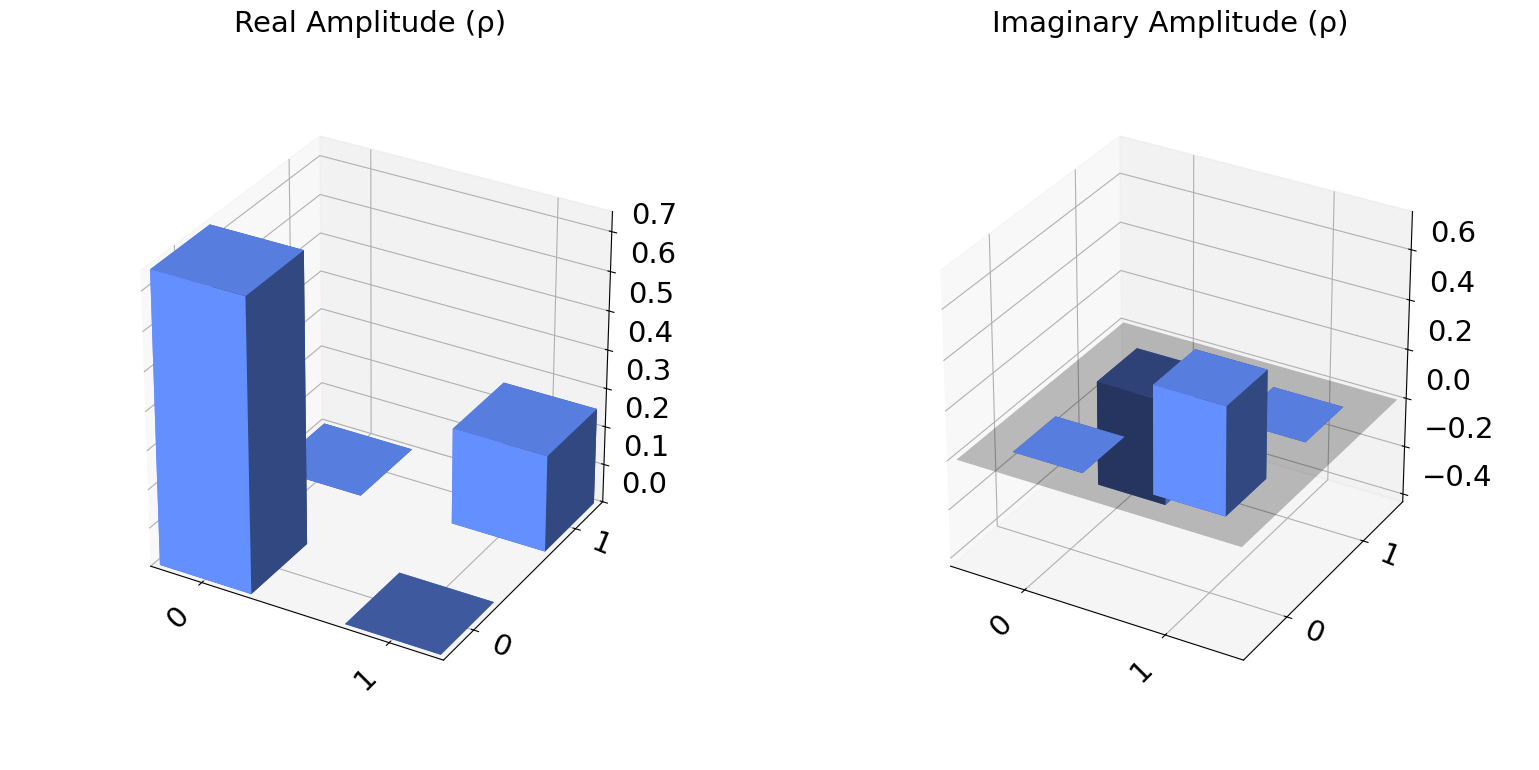

In [24]:
from qiskit.visualization import plot_state_city
 
state = [[ 0.75  , 0.433j],
         [-0.433j, 0.25  ]]
plot_state_city(state)
# state can be array-like list of lists, numpy.array, or more commonly Statevector or DensityMatrix objects obtained from a QuantumCircuit

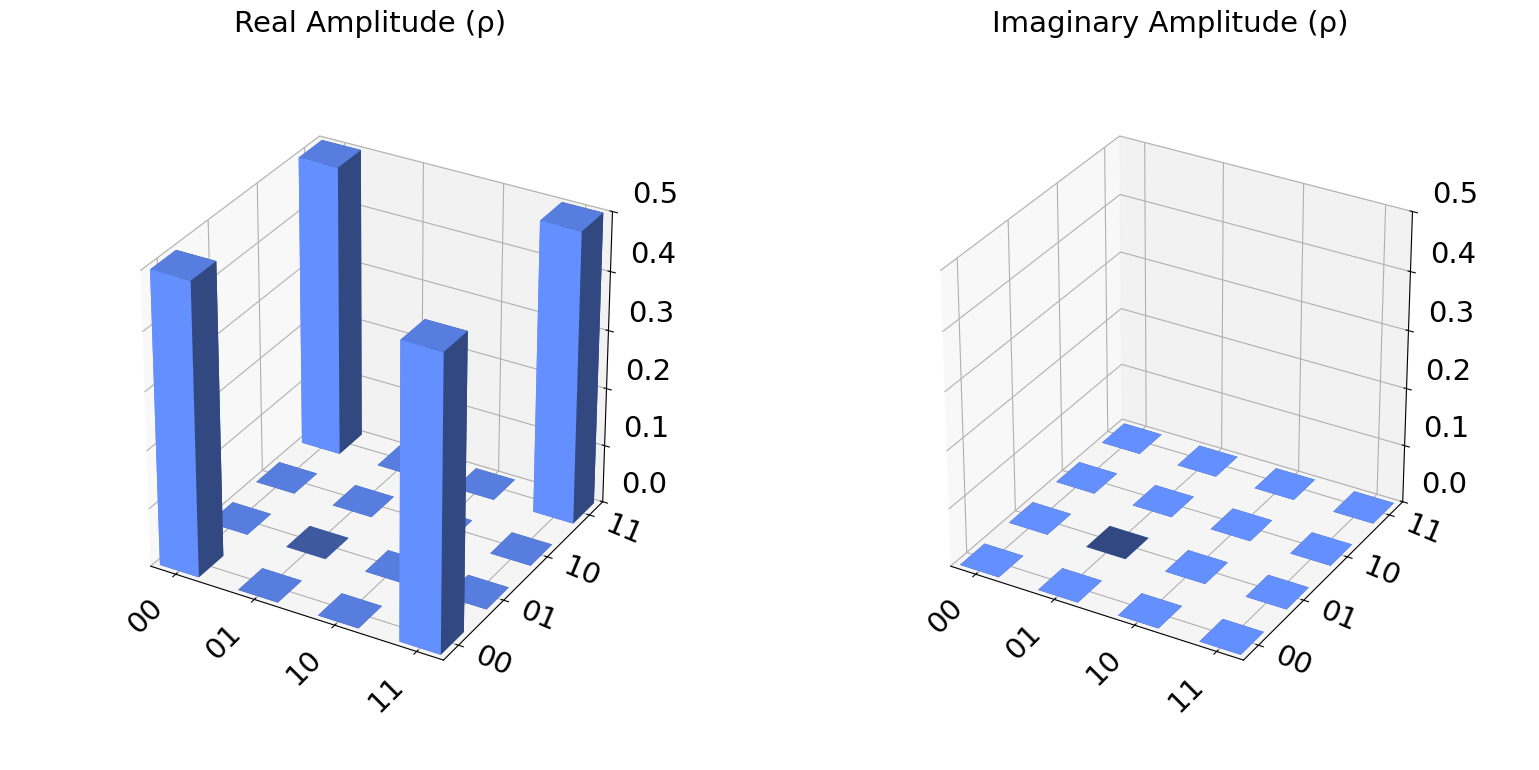

In [25]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_city
 
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
 
# plot using a Statevector
state = Statevector(qc)
plot_state_city(state)

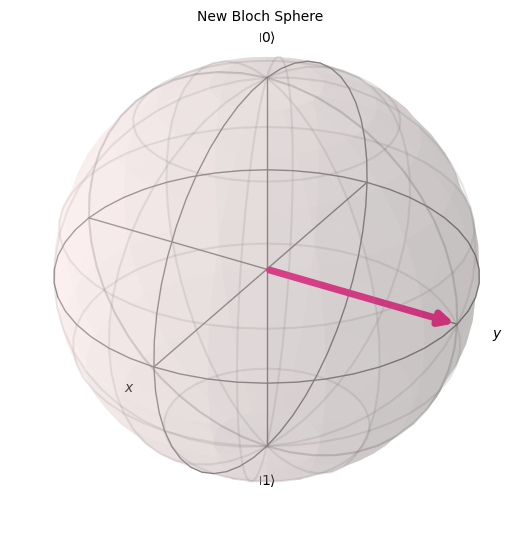

In [27]:
from qiskit.visualization import plot_bloch_vector
 
plot_bloch_vector([0,1,0], title="New Bloch Sphere")

#bloch (list[double]) – array of three elements where [<x>, <y>, <z>] (Cartesian) or [<r>, <theta>, <phi>] (spherical in radians) <theta> is inclination angle from +z direction <phi> is azimuth from +x direction

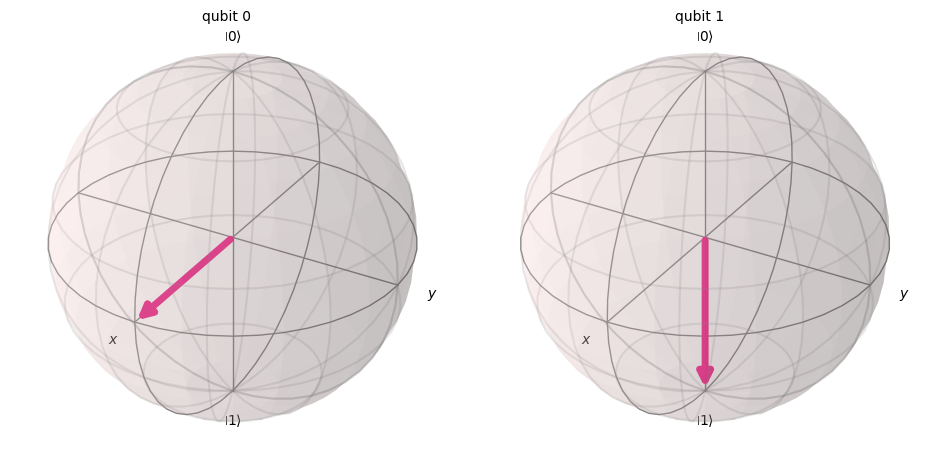

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
 
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
 
state = Statevector(qc)
plot_bloch_multivector(state)

# Alternatively can use density matrix
# from qiskit.quantum_info import DensityMatrix
# matrix = DensityMatrix(qc)
# plot_bloch_multivector(matrix, title='My Bloch Spheres', reverse_bits=True)

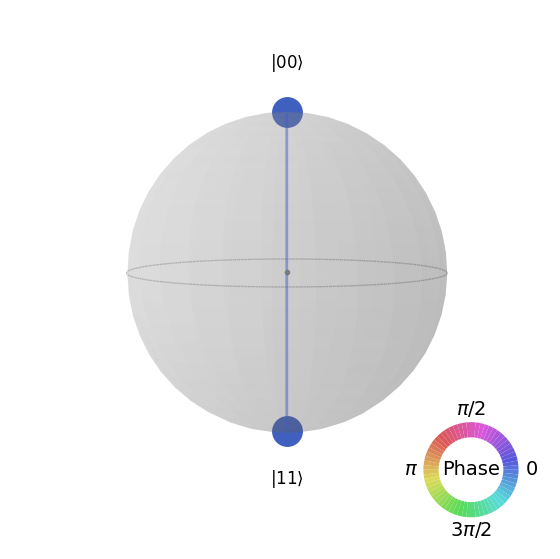

In [6]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere
 
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
 
state = Statevector(qc)
plot_state_qsphere(state)

Device visualisations

<table class="inline-block mx-auto md:mx-0 max-w-full border border-border-subtle-00 border-spacing-0 whitespace-nowrap md:whitespace-normal overflow-x-auto md:tabular-nums text-text-primary"><thead><tr class="border-layer-02 border-b"><th class="text-heading-compact-01 border-layer-02 border-t p-12 m-0 text-left empty:hidden"></th><th class="text-heading-compact-01 border-layer-02 border-t p-12 m-0 text-left empty:hidden"></th></tr></thead><tbody><tr class="border-layer-02 border-b"><td class="p-12 m-0 align-top [&amp;_ul]:!my-0 [&amp;_ul]:list-disc [&amp;_ul]:list-inside [&amp;_ol]:!my-0 [&amp;_ol]:list-decimal [&amp;_ol]:list-inside"><a title="qiskit.visualization.plot_gate_map" class="text-link-primary no-underline hover:underline inline" href="https://quantum.cloud.ibm.com/docs/api/qiskit/qiskit.visualization.plot_gate_map"><code class="text-code-02 inline px-4 bg-background border border-transparent dark:border-border-subtle-00 [overflow-wrap:anywhere] group-[.pre-el]:text-code-02 group-[.pre-el]:inline-block group-[.pre-el]:whitespace-pre group-[.pre-el]:p-12 group-[.pre-el]:pr-[50px] group-[.pre-el]:bg-inherit dark:group-[.pre-el]:border-transparent group-[.paragraph-el]:whitespace-normal">plot_gate_map</code></a>(backend[,&nbsp;figsize,&nbsp;...])</td><td class="p-12 m-0 align-top [&amp;_ul]:!my-0 [&amp;_ul]:list-disc [&amp;_ul]:list-inside [&amp;_ol]:!my-0 [&amp;_ol]:list-decimal [&amp;_ol]:list-inside">Plots the gate map of a device.</td></tr><tr class="border-layer-02 border-b"><td class="p-12 m-0 align-top [&amp;_ul]:!my-0 [&amp;_ul]:list-disc [&amp;_ul]:list-inside [&amp;_ol]:!my-0 [&amp;_ol]:list-decimal [&amp;_ol]:list-inside"><a title="qiskit.visualization.plot_error_map" class="text-link-primary no-underline hover:underline inline" href="https://quantum.cloud.ibm.com/docs/api/qiskit/qiskit.visualization.plot_error_map"><code class="text-code-02 inline px-4 bg-background border border-transparent dark:border-border-subtle-00 [overflow-wrap:anywhere] group-[.pre-el]:text-code-02 group-[.pre-el]:inline-block group-[.pre-el]:whitespace-pre group-[.pre-el]:p-12 group-[.pre-el]:pr-[50px] group-[.pre-el]:bg-inherit dark:group-[.pre-el]:border-transparent group-[.paragraph-el]:whitespace-normal">plot_error_map</code></a>(backend[,&nbsp;figsize,&nbsp;...])</td><td class="p-12 m-0 align-top [&amp;_ul]:!my-0 [&amp;_ul]:list-disc [&amp;_ul]:list-inside [&amp;_ol]:!my-0 [&amp;_ol]:list-decimal [&amp;_ol]:list-inside">Plots the error map of a given backend.</td></tr><tr class="border-layer-02 border-b"><td class="p-12 m-0 align-top [&amp;_ul]:!my-0 [&amp;_ul]:list-disc [&amp;_ul]:list-inside [&amp;_ol]:!my-0 [&amp;_ol]:list-decimal [&amp;_ol]:list-inside"><a title="qiskit.visualization.plot_circuit_layout" class="text-link-primary no-underline hover:underline inline" href="https://quantum.cloud.ibm.com/docs/api/qiskit/qiskit.visualization.plot_circuit_layout"><code class="text-code-02 inline px-4 bg-background border border-transparent dark:border-border-subtle-00 [overflow-wrap:anywhere] group-[.pre-el]:text-code-02 group-[.pre-el]:inline-block group-[.pre-el]:whitespace-pre group-[.pre-el]:p-12 group-[.pre-el]:pr-[50px] group-[.pre-el]:bg-inherit dark:group-[.pre-el]:border-transparent group-[.paragraph-el]:whitespace-normal">plot_circuit_layout</code></a>(circuit,&nbsp;backend[,&nbsp;...])</td><td class="p-12 m-0 align-top [&amp;_ul]:!my-0 [&amp;_ul]:list-disc [&amp;_ul]:list-inside [&amp;_ol]:!my-0 [&amp;_ol]:list-decimal [&amp;_ol]:list-inside">Plot the layout of a circuit transpiled for a given target backend.</td></tr><tr class="border-layer-02 border-b"><td class="p-12 m-0 align-top [&amp;_ul]:!my-0 [&amp;_ul]:list-disc [&amp;_ul]:list-inside [&amp;_ol]:!my-0 [&amp;_ol]:list-decimal [&amp;_ol]:list-inside"><a title="qiskit.visualization.plot_coupling_map" class="text-link-primary no-underline hover:underline inline" href="https://quantum.cloud.ibm.com/docs/api/qiskit/qiskit.visualization.plot_coupling_map"><code class="text-code-02 inline px-4 bg-background border border-transparent dark:border-border-subtle-00 [overflow-wrap:anywhere] group-[.pre-el]:text-code-02 group-[.pre-el]:inline-block group-[.pre-el]:whitespace-pre group-[.pre-el]:p-12 group-[.pre-el]:pr-[50px] group-[.pre-el]:bg-inherit dark:group-[.pre-el]:border-transparent group-[.paragraph-el]:whitespace-normal">plot_coupling_map</code></a>(num_qubits,&nbsp;...[,&nbsp;...])</td><td class="p-12 m-0 align-top [&amp;_ul]:!my-0 [&amp;_ul]:list-disc [&amp;_ul]:list-inside [&amp;_ol]:!my-0 [&amp;_ol]:list-decimal [&amp;_ol]:list-inside">Plots an arbitrary coupling map of qubits (embedded in a plane).</td></tr></tbody></table>

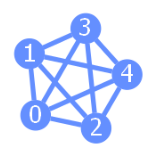

In [1]:
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.visualization import plot_gate_map
 
backend = GenericBackendV2(num_qubits=5)

#Graphviz software required (https://graphviz.org/download/)
plot_gate_map(backend)

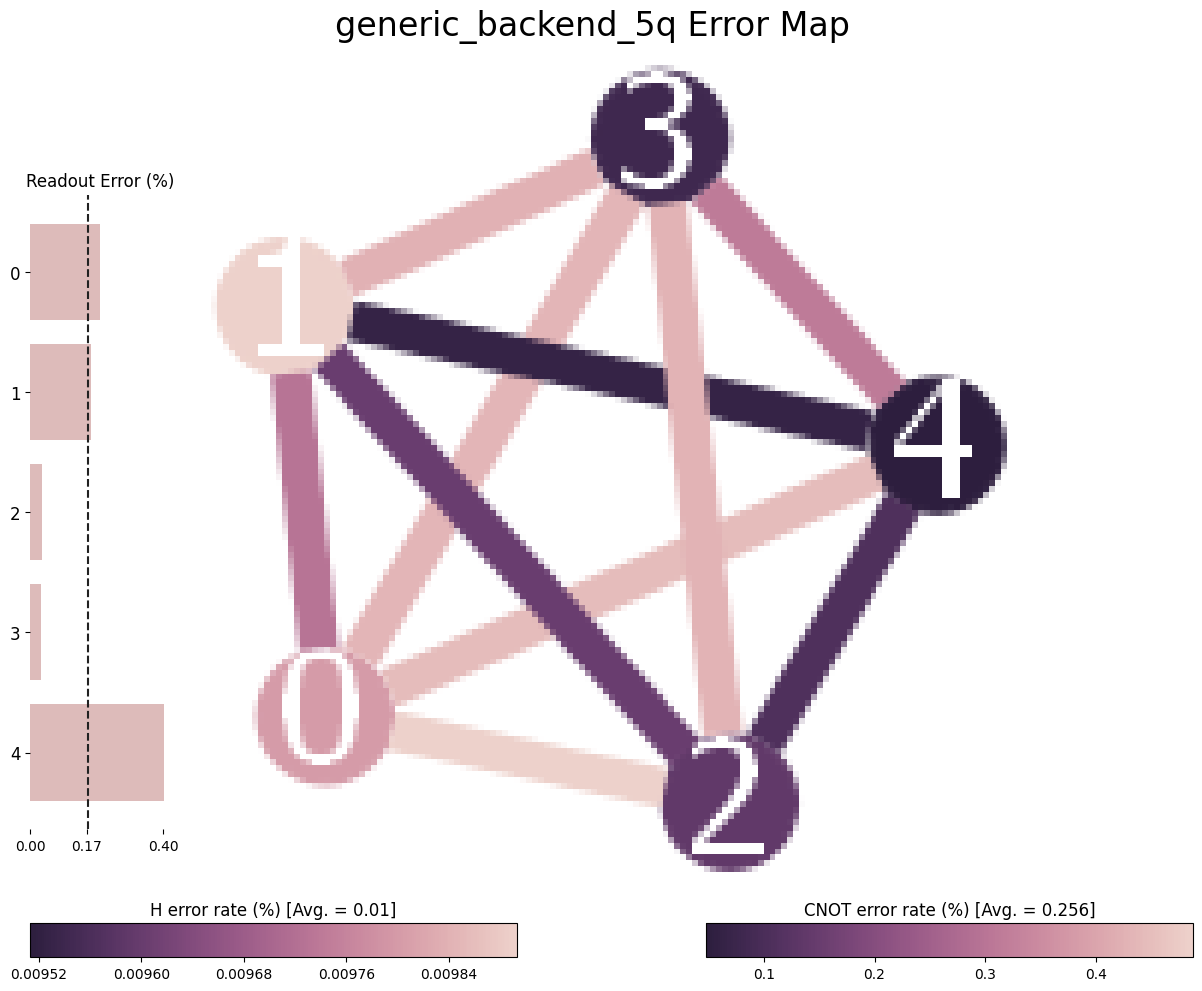

In [2]:
from qiskit.visualization import plot_error_map
from qiskit.providers.fake_provider import GenericBackendV2
 
backend = GenericBackendV2(num_qubits=5)
plot_error_map(backend)

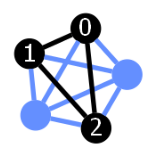

In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.visualization import plot_circuit_layout
 
ghz = QuantumCircuit(3, 3)
ghz.h(0)
for idx in range(1,3):
    ghz.cx(0,idx)
ghz.measure(range(3), range(3))
 
backend = GenericBackendV2(num_qubits=5)
new_circ_lv3 = transpile(ghz, backend=backend, optimization_level=3)
plot_circuit_layout(new_circ_lv3, backend)

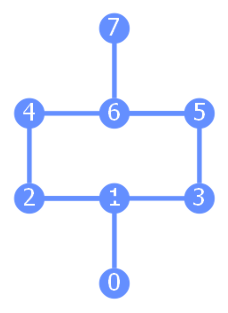

In [4]:
from qiskit.visualization import plot_coupling_map
 
num_qubits = 8
qubit_coordinates = [[0, 1], [1, 1], [1, 0], [1, 2], [2, 0], [2, 2], [2, 1], [3, 1]]
coupling_map = [[0, 1], [1, 2], [2, 3], [3, 5], [4, 5], [5, 6], [2, 4], [6, 7]]
plot_coupling_map(num_qubits, qubit_coordinates, coupling_map)

DAG Visualizations

Plot the directed acyclic graph (dag) to represent operation dependencies in a quantum circuit.

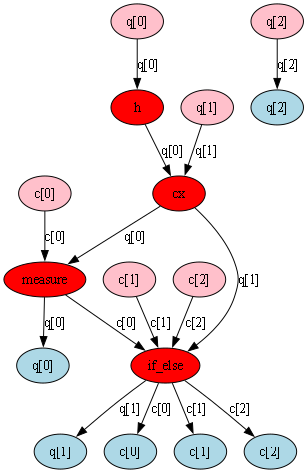

In [5]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.converters import circuit_to_dag
from qiskit.visualization import dag_drawer
 
q = QuantumRegister(3, 'q')
c = ClassicalRegister(3, 'c')
circ = QuantumCircuit(q, c)
circ.h(q[0])
circ.cx(q[0], q[1])
circ.measure(q[0], c[0])
with circ.if_test((c, 2)):
    circ.rz(0.5, q[1])
 
dag = circuit_to_dag(circ)
 
style = {
    "inputnodecolor": "pink",
    "outputnodecolor": "lightblue",
    "opnodecolor": "red",
}
 
dag_drawer(dag, style=style)

## Section 3: Create quantum circuits 

This section accounts for approximately 18% of the exam. 

### Task 3.1: Construct dynamic circuits 

Quantum circuits embedded with logic- can make use of mid-circuit measurements and perform feed-forward operations.

Can reduce 2 qubit gate depth. e.g. CX gate from qubit 1 to qubit 100 would be loads of swap gates, instead can do it with dynamic circuits to 'teleport the CX' without the swaps.

References:

https://quantum.cloud.ibm.com/docs/en/guides/classical-feedforward-and-control-flow

https://www.youtube.com/watch?v=QDPtcwhpQkE

### Task 3.2: Construct parameterized circuits 

Rreferences:

https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.circuit.Parameter 

https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.circuit.QuantumCircuit 

https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.circuit.ParameterExpression

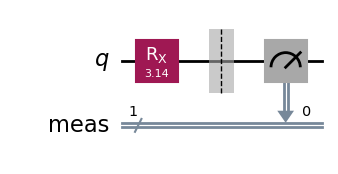

In [ ]:
from qiskit.circuit import QuantumCircuit, Parameter
 
# create the parameter
phi = Parameter("phi")
qc = QuantumCircuit(1)
 
# parameterize the rotation
qc.rx(phi, 0)
qc.draw("mpl")
 
# bind the parameters after circuit to create a bound circuit
bc = qc.assign_parameters({phi: 3.14}) #passs a dictionary of parameter values
bc.measure_all()
bc.draw("mpl")

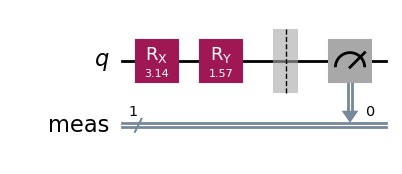

In [2]:
from qiskit.circuit import QuantumCircuit, ParameterVector
 
# create the parameter
phi = ParameterVector("phi", 2)
qc = QuantumCircuit(1)
 
# parameterize the rotation
qc.rx(phi[0], 0)
qc.ry(phi[1], 0)
qc.draw("mpl")
 
# bind the parameters after circuit to create a bound circuit
bc = qc.assign_parameters({phi: [3.14, 1.57]}) #passs a dictionary of parameter values
bc.measure_all()
bc.draw("mpl")

In [3]:
phi[0]

ParameterVectorElement(phi[0])

In [4]:
phi[0].vector

ParameterVector(name='phi', length=2)

C:\Users\Jayde\AppData\Local\Temp\ipykernel_2904\3772891618.py:2: DeprecationWarning: The class ``qiskit.circuit.library.n_local.efficient_su2.EfficientSU2`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the function qiskit.circuit.library.efficient_su2 instead.
  esu2 = EfficientSU2(num_qubits=2)


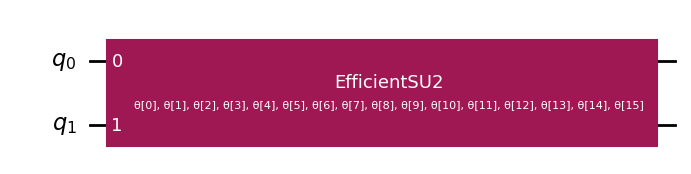

In [8]:
from qiskit.circuit.library import EfficientSU2
esu2 = EfficientSU2(num_qubits=2)
esu2.draw("mpl")

In [9]:
esu2.parameters

ParameterView([ParameterVectorElement(θ[0]), ParameterVectorElement(θ[1]), ParameterVectorElement(θ[2]), ParameterVectorElement(θ[3]), ParameterVectorElement(θ[4]), ParameterVectorElement(θ[5]), ParameterVectorElement(θ[6]), ParameterVectorElement(θ[7]), ParameterVectorElement(θ[8]), ParameterVectorElement(θ[9]), ParameterVectorElement(θ[10]), ParameterVectorElement(θ[11]), ParameterVectorElement(θ[12]), ParameterVectorElement(θ[13]), ParameterVectorElement(θ[14]), ParameterVectorElement(θ[15])])

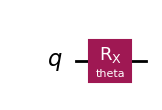

In [12]:
qc = QuantumCircuit(1)
theta = Parameter('theta') 
qc.rx(theta, 0)
qc.draw("mpl")

### Task 3.3: Transpile and optimize circuits 

References:

https://quantum.cloud.ibm.com/docs/en/guides/transpiler-stages (this one is really useful)

https://quantum.cloud.ibm.com/docs/en/guides/transpile-with-pass-managers 

https://quantum.cloud.ibm.com/docs/en/api/qiskit/transpiler_passes

In [15]:
# Save your API key to track your progress and have access to the quantum computers

your_api_key = "MbxnLwBt47o9pBKzSK5lSNcoFDh6OPtfInPbHrPZ8zN2"
your_crn = "crn:v1:bluemix:public:quantum-computing:us-east:a/d9995ed2a4374401bccdffd136f33131:a1c0d7e5-589e-4f02-a1e7-24b65437f5a7::"

from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(
    channel="ibm_quantum_platform",
    token=your_api_key,
    instance=your_crn,
    name="qiskit-guide",
    overwrite=True
)

In [16]:
service = QiskitRuntimeService(name="qiskit-guide")
service.saved_accounts()

{'qiskit-guide': {'channel': 'ibm_quantum_platform',
  'url': 'https://cloud.ibm.com',
  'token': 'MbxnLwBt47o9pBKzSK5lSNcoFDh6OPtfInPbHrPZ8zN2',
  'instance': 'crn:v1:bluemix:public:quantum-computing:us-east:a/d9995ed2a4374401bccdffd136f33131:a1c0d7e5-589e-4f02-a1e7-24b65437f5a7::',
  'verify': True,
  'private_endpoint': False}}

Text(0, 0.5, 'Counts')

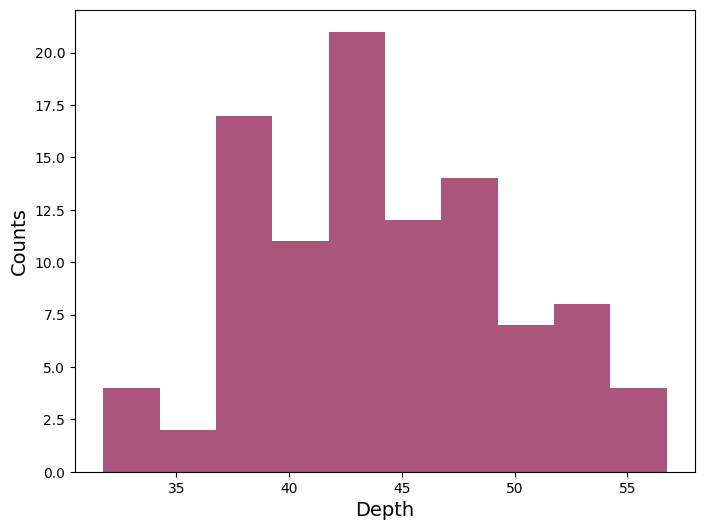

In [21]:
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit_ibm_runtime.fake_provider import FakeAuckland, FakeWashingtonV2
from qiskit.transpiler import generate_preset_pass_manager
 
backend = FakeAuckland()
 
ghz = QuantumCircuit(15)
ghz.h(0)
ghz.cx(0, range(1, 15))
 
depths = []
# Run the transpiler multiple times with different seeds, stochastic heuristic algorithm called SabreSwap is used for routing stage so same results are not guaranteed
for seed in range(100):
    pass_manager = generate_preset_pass_manager(
        optimization_level=3,
        backend=backend,
        seed_transpiler=seed,  # For reproducible results
    )
    depths.append(pass_manager.run(ghz).depth())
 
plt.figure(figsize=(8, 6))
plt.hist(depths, align="left", color="#AC557C")
plt.xlabel("Depth", fontsize=14)
plt.ylabel("Counts", fontsize=14)

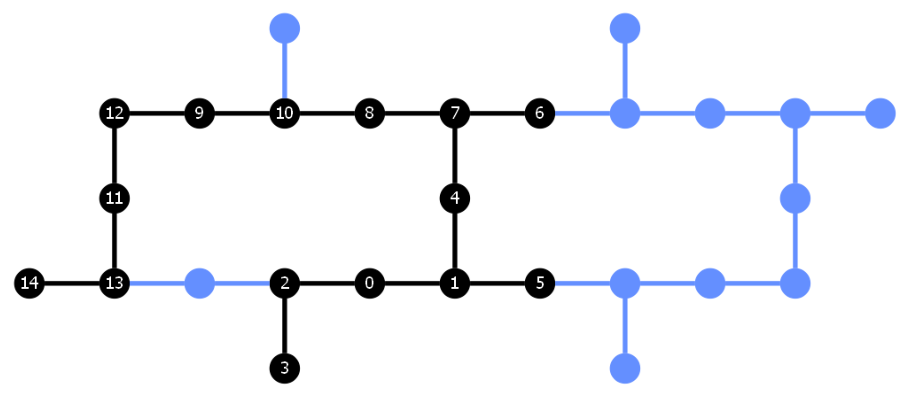

In [22]:
from qiskit.visualization import plot_circuit_layout
 
# Plot the hardware graph and indicate which hardware qubits were chosen to run the circuit
transpiled_circ = pass_manager.run(ghz)
plot_circuit_layout(transpiled_circ, backend)

Translation stage

native gates:['cx', 'delay', 'for_loop', 'id', 'if_else', 'measure', 'reset', 'rz', 'switch_case', 'sx', 'x']


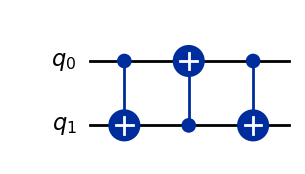

In [23]:
print("native gates:" + str(sorted(backend.operation_names)))
qc = QuantumCircuit(2)
qc.swap(0, 1)
qc.decompose().draw("mpl")

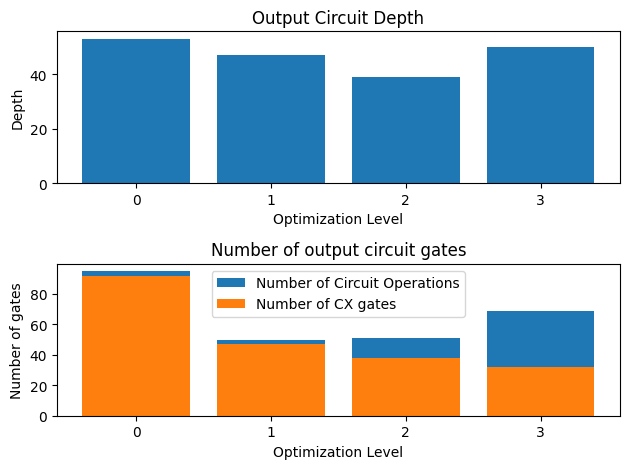

In [24]:
ghz = QuantumCircuit(15)
ghz.h(0)
ghz.cx(0, range(1, 15))
 
depths = []
gate_counts = []
multiqubit_gate_counts = []
levels = [str(x) for x in range(4)]
for level in range(4):
    pass_manager = generate_preset_pass_manager(
        optimization_level=level,
        backend=backend,
        seed_transpiler=1234,
    )
    circ = pass_manager.run(ghz)
    depths.append(circ.depth())
    gate_counts.append(sum(circ.count_ops().values()))
    multiqubit_gate_counts.append(circ.count_ops()["cx"])
 
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.bar(levels, depths, label="Depth")
ax1.set_xlabel("Optimization Level")
ax1.set_ylabel("Depth")
ax1.set_title("Output Circuit Depth")
ax2.bar(levels, gate_counts, label="Number of Circuit Operations")
ax2.bar(levels, multiqubit_gate_counts, label="Number of CX gates")
ax2.set_xlabel("Optimization Level")
ax2.set_ylabel("Number of gates")
ax2.legend()
ax2.set_title("Number of output circuit gates")
fig.tight_layout()
plt.show()

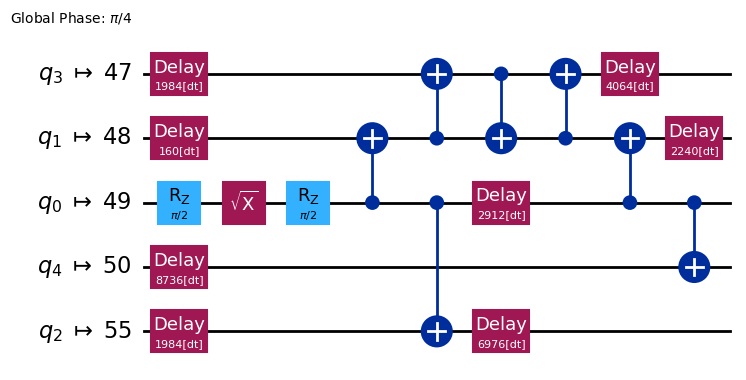

In [25]:
ghz = QuantumCircuit(5)
ghz.h(0)
ghz.cx(0, range(1, 5))
 
 
# Use fake backend
backend = FakeWashingtonV2()
 
# Run with optimization level 3 and 'asap' scheduling pass
pass_manager = generate_preset_pass_manager(
    optimization_level=3,
    backend=backend,
    scheduling_method="asap",
    seed_transpiler=1234,
)
 
 
circ = pass_manager.run(ghz)
circ.draw(output="mpl", idle_wires=False)

In [ ]:
from qiskit.visualization import timeline
timeline.draw(circ, target=backend.target)

### Task 3.4: Construct basic quantum circuits 

References:

https://quantum.cloud.ibm.com/docs/en/api/qiskit/circuit

https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.circuit.QuantumCircuit

# stuff

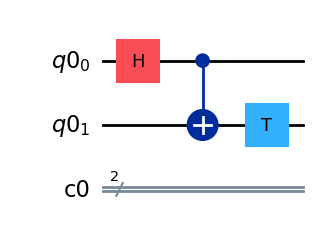

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)

qc.h(qr[0])
qc.cx(qr[0], qr[1])  # control, target
qc.t(qr[1])

qc.draw("mpl")

In [20]:
from qiskit.quantum_info import Statevector
state = Statevector(qc)

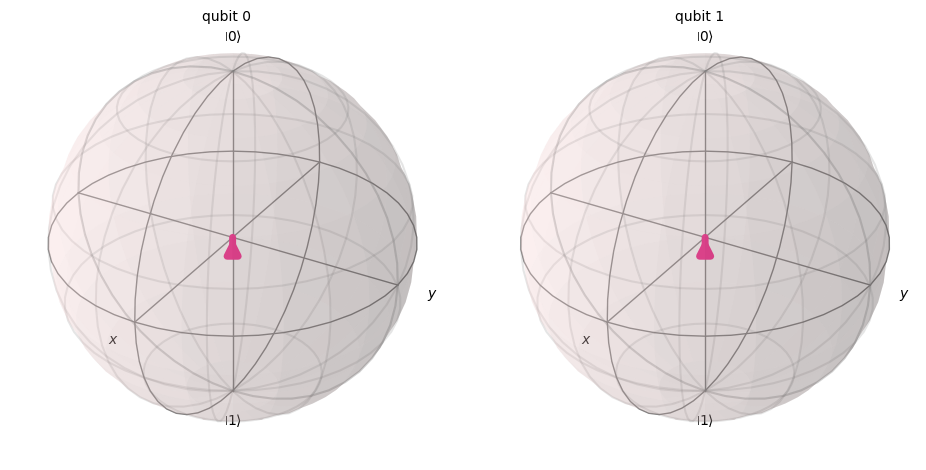

In [21]:
from qiskit.visualization import plot_state_city, plot_bloch_multivector
plot_state_city(state)
plot_bloch_multivector(state)

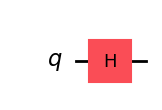

In [2]:
qc = QuantumCircuit(1)
qc.h(0)
qc.draw("mpl")

In [3]:
from qiskit.quantum_info import Operator
h_op = Operator(qc)

In [4]:
h_op.data

array([[ 0.70710678+0.j,  0.70710678+0.j],
       [ 0.70710678+0.j, -0.70710678+0.j]])

In [5]:
from qiskit.visualization import array_to_latex
array_to_latex(h_op.data)

<IPython.core.display.Latex object>

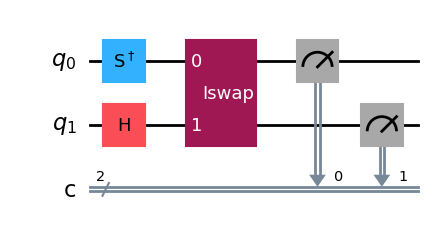

In [25]:
from qiskit.circuit.random import random_circuit
 
circ = random_circuit(2, 2, measure=True)
circ.draw(output='mpl')

In [6]:
from qiskit.circuit.library import HGate
import numpy as np

H = HGate().to_matrix()
print(H)
# For nicer formatting:
np.set_printoptions(precision=6, suppress=True)
print(H)

[[ 0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j]]
[[ 0.707107+0.j  0.707107+0.j]
 [ 0.707107+0.j -0.707107+0.j]]


In [9]:
from qiskit.circuit.library import HGate
from qiskit.visualization import array_to_latex

H = HGate().to_matrix()
array_to_latex(H)

<IPython.core.display.Latex object>

In [12]:
HGate()

Instruction(name='h', num_qubits=1, num_clbits=0, params=[])